Base code for a simple FBP

In [8]:
import finesse
finesse.configure(plotting=True)
fbp=finesse.Model()
fbp.parse("""
l laser P=10m
s s0 laser.p1 eom.p1 L=0
mod eom f=10k midx=1.08        #Modulation Frequency =10kHz
s s1 eom.p2 m1.p1 L=0
m m1 R=0.997367 L=0
s cav m1.p2 m2.p1 L=0.3
m m2 R=m1.R L=m1.L

pd Circulating m1.p2.o
pd1 Transf1I m2.p2.o f=eom.f phase=0
pd1 Reflf1I m1.p1.o f=eom.f phase=0
xaxis(m1.phi,lin,-2,2,10000)
""")


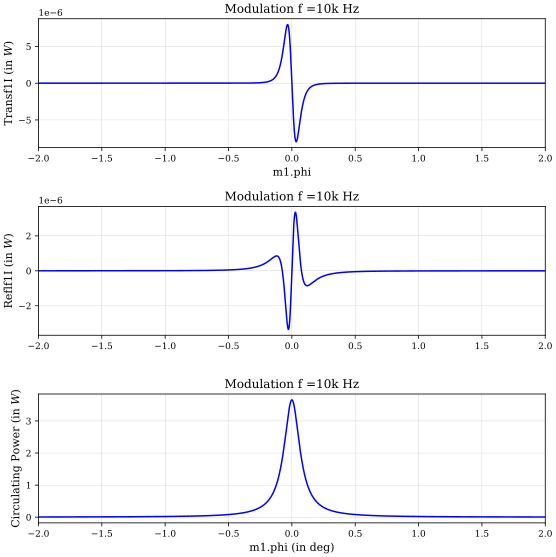

In [10]:
import matplotlib.pyplot as plt
import numpy as np
Circ=[]
Trans=[]
Refl=[]
phi=np.linspace(-2,2,10000)
out=fbp.run()
for i in range(10000):
    Circ.append(out["Circulating"][i])
    Trans.append(out["Transf1I"][i])
    Refl.append(out["Reflf1I"][i])
fig, a =plt.subplots(3,figsize=(8,8),sharex=False)
a[0].plot(phi,Trans)
a[0].set_ylabel("Transf1I (in $W$)")
a[0].set_title("Modulation f =10k Hz")
a[0].set_xlabel("m1.phi")
a[1].plot(phi,Refl)
a[1].set_ylabel("Reflf1I (in $W$)")
a[1].set_title("Modulation f =10k Hz")
a[2].plot(phi,Circ)
a[2].set_ylabel("Circulating Power (in $W$)")
a[2].set_xlabel("m1.phi (in deg)")
a[2].set_title("Modulation f =10k Hz")
fig.tight_layout()

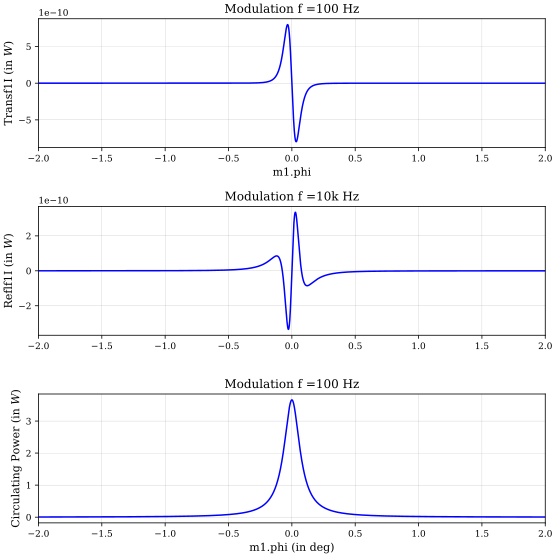

In [11]:
fbp.eom.f=100 #Changing the Modulation frequency to 100Hz
Circ=[]
Trans=[]
Refl=[]
phi=np.linspace(-2,2,10000)
out=fbp.run()
for i in range(10000):
    Circ.append(out["Circulating"][i])
    Trans.append(out["Transf1I"][i])
    Refl.append(out["Reflf1I"][i])
fig, a =plt.subplots(3,figsize=(8,8),sharex=False)
a[0].plot(phi,Trans)
a[0].set_ylabel("Transf1I (in $W$)")
a[0].set_title("Modulation f =100 Hz")
a[0].set_xlabel("m1.phi")
a[1].plot(phi,Refl)
a[1].set_ylabel("Reflf1I (in $W$)")
a[1].set_title("Modulation f =10k Hz")
a[2].plot(phi,Circ)
a[2].set_ylabel("Circulating Power (in $W$)")
a[2].set_xlabel("m1.phi (in deg)")
a[2].set_title("Modulation f =100 Hz")
fig.tight_layout()